In [254]:
import numpy as np
import control
from control.matlab import *
import matplotlib.pyplot as plt

In [255]:
ts = 0.02
num = [1]
den = [1, -1.479, 0.48]
G = tf(num,den, dt= ts)

In [256]:
G

TransferFunction(array([1]), array([ 1.   , -1.479,  0.48 ]), 0.02)

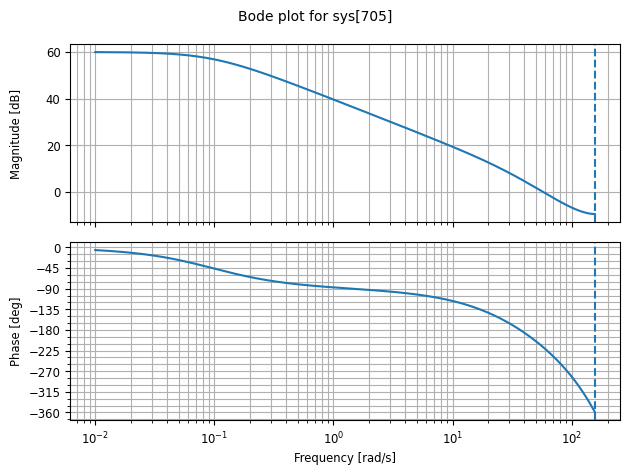

In [257]:
bode(G)
plt.show()

In [258]:
T = 30 # aumentando il numero di dati il vrft migliora, conviene aumentare la lunghezza del segnale da qui piuttosto che ridurre il tempo di campionamento
t = np.arange(0, T, ts)
u = np.random.normal(0, 5, t.shape)

/home/rbusetto/.virtualenvs/sysid-transformers-control/lib/python3.10/site-packages/control/timeresp.py:1003: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


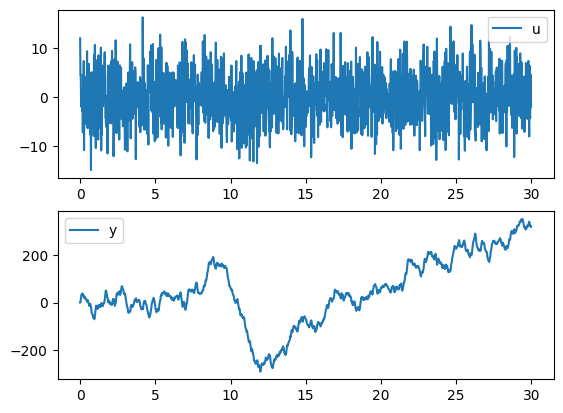

In [259]:
y, t, _ = lsim(G, u, t)
plt.subplot(211)
plt.plot(t, u, label="u")
plt.legend()
plt.subplot(212)
plt.plot(t, y, label="y")
plt.legend()

In [1]:
# VRFT
s = tf('s')
tau = 5 # s
M = 1/(1 + (tau/(2*np.pi))*s)
M = M*(1 + 1e-2*(tau/(2*np.pi))*s) # add a high freq zero for inversion
T_cl = tau + 0.5
t_cl = np.arange(0, T_cl, ts)
y_d, _ = step(M, t_cl)
plt.plot(t_cl, y_d)

NameError: name 'tf' is not defined

In [261]:
# vrft
r_v = lsim(M ** (-1), y, t)[0]
e_v = r_v - y

In [262]:
B=[tf([1],[1],ts),
   tf(ts*np.array([1, 1]),2*np.array([1, -1]),ts)]

In [263]:
import cvxpy as cp
theta = cp.Variable(2)
u_theta = theta[0]*lsim(B[0], e_v, t)[0] + theta[1]*lsim(B[1], e_v, t)[0]

In [264]:
cost = cp.sum_squares(u - u_theta)
prob = cp.Problem(cp.Minimize(cost))
prob.solve()
theta_sol = theta.value

In [265]:
print(theta_sol)

[0.00097159 0.00079854]


In [266]:
C = theta_sol[0]*B[0] + theta_sol[1]*B[1]

In [267]:
##THESE SHOULD BE THE PARAMETERS, I LOOKED THEM UP IN THE META_DATASET
right_params =[0.05534014, 0.01607034]
right_C = right_params[0]*B[0] + right_params[1]*B[1]

In [268]:
##per 'allungare' i plot
t_cl = 10* t_cl
y_d, _ = step(M, t_cl)

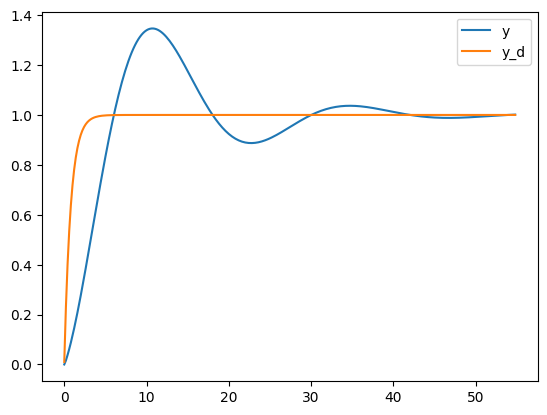

In [269]:
F = C*G/(1 + C*G)
y_cl, _ = step(F, t_cl)
plt.plot(t_cl, y_cl, label='y')
plt.plot(t_cl, y_d, label='y_d')
plt.legend()
plt.show()

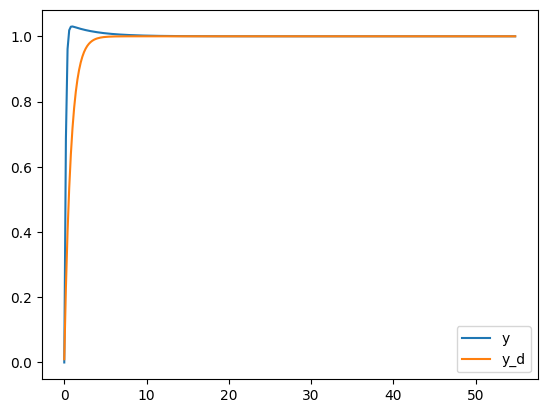

In [270]:
FF = right_C * G / (1 + right_C * G)
y_cl, _ = step(FF, t_cl)
plt.plot(t_cl, y_cl, label='y')
plt.plot(t_cl, y_d, label='y_d')
plt.legend()
plt.show()